In [23]:
import pandas as pd
df = pd.read_csv('random_cpu_usage6.csv')
df.head()

,cpu_usage,memory_usage
0,0.2490,0.3449
1,0.8916,0.3144
2,0.2050,0.1799
3,0.5939,0.3636
4,0.8789,0.3454


In [24]:
from sklearn.cluster import KMeans
import numpy as np

In [131]:
x = df[['cpu_usage', 'memory_usage']].values

In [132]:
x

array([[0.249 , 0.3449],
       [0.8916, 0.3144],
       [0.205 , 0.1799],
       ...,
       [0.9662, 0.2756],
       [0.7376, 0.2017],
       [0.5454, 0.0109]])

In [190]:
k_means = KMeans(n_clusters=16, random_state=1, n_init=4).fit(x)

In [250]:
len(k_means.labels_), len(k_means.cluster_centers_)

(6000, 16)

In [151]:
import matplotlib.pyplot as plt

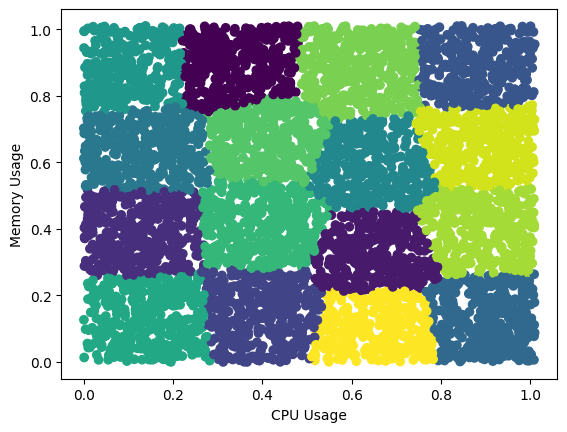

In [253]:
plt.scatter(x[:, 0], x[:, 1], c=k_means.labels_)
# plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], color='red')
plt.xlabel('CPU Usage')
plt.ylabel('Memory Usage')
plt.show()


In [178]:
df['anomaly_label'] = k_means.labels_

In [249]:
df_unique = df.drop_duplicates(subset='anomaly_label')
df_unique.sort_values(by=['anomaly_label'])


,cpu_usage,memory_usage,anomaly_label,is_anomaly
3,0.5939,0.3636,0,0
8,0.4935,0.2448,1,1
5,0.0560,0.8618,2,1
1,0.8916,0.3144,3,1
2,0.2050,0.1799,4,0
7,0.4106,0.8326,5,0
4,0.8789,0.3454,6,1
11,0.8558,0.9303,7,1
0,0.2490,0.3449,8,0
24,0.7333,0.7456,9,1


In [193]:
is_anomaly_condition = (df['anomaly_label'] == 8) | (df['anomaly_label'] == 0) | (df['anomaly_label'] == 12) | (df['anomaly_label'] == 4) | (df['anomaly_label'] == 14) | (df['anomaly_label'] == 13) | (df['anomaly_label'] == 5)

In [231]:
df['is_anomaly'] = np.where(is_anomaly_condition, 0, 1)

In [244]:
df.where(df['anomaly_label'] == 3).dropna()

,cpu_usage,memory_usage,anomaly_label,is_anomaly
1,0.8916,0.3144,3.0,1.0
14,0.9526,0.1720,3.0,1.0
18,0.8778,0.0677,3.0,1.0
32,0.7646,0.0540,3.0,1.0
33,0.7191,0.1612,3.0,1.0
...,...,...,...,...
5969,0.7011,0.1381,3.0,1.0
5985,0.9390,0.1811,3.0,1.0
5991,0.6873,0.0930,3.0,1.0
5997,0.9662,0.2756,3.0,1.0


In [230]:
df['is_anomaly'] = np.where(df['is_anomaly'] == 0, 'Yes', 'No')

In [204]:
df.groupby('is_anomaly').first()


,cpu_usage,memory_usage,anomaly_label
is_anomaly,,,
0,0.8916,0.3144,3
1,0.2490,0.3449,8


In [211]:
x = df[['cpu_usage', 'memory_usage']].values
y = df['is_anomaly'].values

x_train = x[:int(len(x) * 0.8)]
y_train = y[:int(len(y) * 0.8)]

x_test = x[int(len(x) * 0.8):]
y_test = y[int(len(y) * 0.8):]

In [212]:
x_train, y_train

(array([[0.249 , 0.3449],
        [0.8916, 0.3144],
        [0.205 , 0.1799],
        ...,
        [0.9714, 0.6996],
        [0.1155, 0.6179],
        [0.16  , 0.011 ]]),
 array([0, 1, 0, ..., 1, 0, 0]))

In [198]:
import tensorflow as tf

In [213]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [214]:
model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/50


150/150 [==============================] - 1s 3ms/step - loss: 0.5624 - accuracy: 0.6660 - val_loss: 0.4717 - val_accuracy: 0.7842
Epoch 2/50
150/150 [==============================] - 0s 2ms/step - loss: 0.3891 - accuracy: 0.8344 - val_loss: 0.3566 - val_accuracy: 0.8492
Epoch 3/50
150/150 [==============================] - 0s 2ms/step - loss: 0.3077 - accuracy: 0.8679 - val_loss: 0.3138 - val_accuracy: 0.8642
Epoch 4/50
150/150 [==============================] - 0s 2ms/step - loss: 0.2716 - accuracy: 0.8819 - val_loss: 0.2843 - val_accuracy: 0.8725
Epoch 5/50
150/150 [==============================] - 0s 2ms/step - loss: 0.2548 - accuracy: 0.8888 - val_loss: 0.2777 - val_accuracy: 0.8792
Epoch 6/50
150/150 [==============================] - 0s 2ms/step - loss: 0.2421 - accuracy: 0.8921 - val_loss: 0.2559 - val_accuracy: 0.8750
Epoch 7/50
150/150 [==============================] - 0s 2ms/step - loss: 0.2305 - accuracy: 0.9013 - val_loss: 0.2457 - val_accuracy: 0.8917
Epoch 8/50
150/15

In [215]:
model.evaluate(x_test, y_test)

 1/38 [..............................] - ETA: 0s - loss: 0.0499 - accuracy: 1.0000

38/38 [==============================] - 0s 2ms/step - loss: 0.1003 - accuracy: 0.9567


[0.10034240782260895, 0.9566666483879089]

In [239]:
model.predict([[0.7, 0.7], [0.1, 0.1], [0.9, 0.9], [0.5, 0.5], [0.3, 0.3], [0.2, 0.2], [0.4, 0.4], [0.6, 0.6], [0.8, 0.8]])

1/1 [==============================] - 0s 45ms/step


array([[9.7639114e-01],
       [1.1455636e-03],
       [9.9999839e-01],
       [1.1735793e-02],
       [1.8189883e-02],
       [2.0504210e-04],
       [1.5544633e-02],
       [3.5139990e-01],
       [9.9981952e-01]], dtype=float32)

In [241]:
[[9.7639114e-01],
       [1.1455636e-03],
       [9.9999839e-01],
       [1.1735793e-02],
       [1.8189883e-02],
       [2.0504210e-04],
       [1.5544633e-02],
       [3.5139990e-01],
       [9.9981952e-01]]

[[0.97639114],
 [0.0011455636],
 [0.99999839],
 [0.011735793],
 [0.018189883],
 [0.0002050421],
 [0.015544633],
 [0.3513999],
 [0.99981952]]